### Data Analysis of WeRateDogs Twitter archive

#### Context
Goal: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

####  Data
In this project, three datasets were used.

* WeRateDogs Twitter archive
* Tweet image predictions File(URL)
* Additional data from twitter API.

#### Import necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
import os


### Gathering data

* WeRateDogs Twitter Archive

In [2]:
df_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Tweet image predictions File(URL)

In [5]:
# Download Tweet image predictions programmatically using the Requests library 

url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
# open a file and write the content into the file
with open('image-predictions.tsv',mode='wb') as fileImage:
    fileImage.write(response.content)

In [7]:
df_image = pd.read_csv('image-predictions.tsv',sep='\t') # read tsv file

In [8]:
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [9]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###  Additional data from twitter API

* I used information from https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ to read the downloaded dataset (tweet_json.txt file)

The dataset has been downloaded already and written into the tweet_json.txt file. The data will be extracted from this file below

In [10]:
# Download Tweet image predictions programmatically using the Requests library 

url= 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response_tweet = requests.get(url)

In [11]:
#we write this list into a txt file
with open('tweet_json.txt', mode= 'wb') as file:
        file.write(response_tweet.content)

In [12]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))


In [13]:
tweets[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [14]:
#create a list of data from tweet_json.txt
list_tweets = []

for json_data in tweets:
    list_tweets.append({'id' : json_data['id'],
                       'retweet_count': int(json_data['retweet_count']),
                       'favorite_count' : int(json_data['favorite_count'])})
   
#create a Dataframe
tweets_api = pd.DataFrame(list_tweets, columns = ['id', 'retweet_count' , 'favorite_count']) 

#Check out the obatined DataFrame
tweets_api.head() 

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [15]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Accessing Data

### Visual Assessment

* The three datasets are viewed using the head() and tail() methods to assess them for Tidiness and Quality

#### WeRateDogs Twitter Archive

In [16]:
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [17]:
df_archive.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Observation
- Missing values are noticed in the dataset

#### Tweet image predictions File(URL)

In [18]:
df_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [19]:
df_image.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


#### Observation
- The observation on some columns need to be standardize to lower case for clarity. Overall, visually the dataset is clean

#### Additional data from twitter API

In [20]:
tweets_api.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [21]:
tweets_api.tail(3)

,id,retweet_count,favorite_count
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


#### Observation
- The dataset visually looks clean.

### Programmatic Assessment

- Accessment of the 3 datasets using pandas functions

#### WeRateDogs Twitter Archive

In [22]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When it's Janet from accounting's birthday but...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
1801,676957860086095872,NaN,NaN,2015-12-16 02:51:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10/10 I'd follow this dog into battle no quest...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676957860...,10,10,None,None,None,None,None


In [23]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Observation:
- Presence of null values in 5 columns

In [24]:
df_archive.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [25]:
df_archive.describe(exclude = 'number').T

,count,unique,top,freq
timestamp,2356,2356,2017-08-01 16:23:56 +0000,1
source,2356,4,"<a href=""http://twitter.com/download/iphone"" r...",2221
text,2356,2356,This is Phineas. He's a mystical boy. Only eve...,1
retweeted_status_timestamp,181,181,2017-07-19 00:47:34 +0000,1
expanded_urls,2297,2218,https://twitter.com/dog_rates/status/667152164...,2
name,2356,957,None,745
doggo,2356,2,None,2259
floofer,2356,2,None,2346
pupper,2356,2,None,2099
puppo,2356,2,None,2326


#### Observation:
- Doggo, floofer, pupper and puppo seems to have 2 unique values.

In [26]:
# check for duplicated data

df_archive.duplicated().sum()

0

In [27]:
# check for counts of each value

df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

#### Observation:
- Rating denominator should be 10. Further analysis will be made

In [28]:
# check for counts of each value

df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

#### Observation:
- Some extreme values are detected

In [29]:
3# check the value counts of the source column

df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Observation:
- It is observed that most data was extracted from the iPhone. Further cleaning will be made to get this information

#### Tweet image predictions File(URL)

In [30]:
df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,Chihuahua,0.841084,True,Pomeranian,0.120530,True,Pekinese,0.006600,True
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
701,684880619965411328,https://pbs.twimg.com/media/CYEvSaRWwAAukZ_.jpg,1,clog,0.081101,False,spindle,0.066957,False,agama,0.060884,False
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True


In [31]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Observation:

* There are no missing values.

In [32]:
df_image.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
tweet_id,2075.0,7.384514e+17,6.785203e+16,6.660209e+17,6.764835e+17,7.119988e+17,7.932034e+17,8.924206e+17
img_num,2075.0,1.203855e+00,5.618750e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2075.0,5.945483e-01,2.711735e-01,4.433340e-02,3.644120e-01,5.882300e-01,8.438550e-01,1.000000e+00
p2_conf,2075.0,1.345886e-01,1.006657e-01,1.011300e-08,5.388625e-02,1.181810e-01,1.955655e-01,4.880140e-01
p3_conf,2075.0,6.032417e-02,5.090593e-02,1.740170e-10,1.622240e-02,4.944380e-02,9.180755e-02,2.734190e-01


In [33]:
df_image.describe(exclude = 'number').T

,count,unique,top,freq
jpg_url,2075,2009,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,2
p1,2075,378,golden_retriever,150
p1_dog,2075,2,True,1532
p2,2075,405,Labrador_retriever,104
p2_dog,2075,2,True,1553
p3,2075,408,Labrador_retriever,79
p3_dog,2075,2,True,1499


#### Observation:
- There are 408 unique p3 with Labrador_retriever the most frequent
- There are 378 unique p1 with golden_retriever the most frequent

In [34]:
# check for duplicated data

df_image.duplicated().sum()

0

In [35]:
df_image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
df_image.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [37]:
df_image.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Additional data from twitter API

In [38]:
tweets_api.sample(2)

,id,retweet_count,favorite_count
1736,679527802031484928,823,2892
2037,671547767500775424,658,1444


In [39]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [40]:
tweets_api.duplicated().sum()

0

In [41]:
# Top 5 favorite_count records

tweets_api.sort_values(['favorite_count'], ascending= 0)[0:5]

,id,retweet_count,favorite_count
412,822872901745569793,48265,132810
1037,744234799360020481,79515,131075
65,879415818425184262,45849,107956
533,807106840509214720,56625,107015
134,866450705531457537,32883,106827


In [42]:
tweets_api.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

### Cleaning Summary

#### Tidiness List

`WeRateDogs`

- Columns 'doggo', 'floofer', 'pupper', 'puppo' in d should be a single column.

- Change tweet_id to integer datatype. Merge with the two tables for a master dataset

`Tweets_api`

Merge 'tweets_api' and 'df_image' to 'df_archive' 

#### Quality List

`WeRateDogs`

- Drop columns that won't be used for analysis especially with null values.
- Change the timestamp to a datetime datatype.
- In timestamp column, +0000 should be removed.
- Create a standard for "rating_denominator". The standard is 10. 
- The "rating_numerator" has some extreme values. Fix that. 0-10
- The name column has 'a' and None. It would be changed to NaN
- The dog names format should be consistent. Make the first letter capital for all the names or all small letters.
- The source column observations can be extracted in simpler form.

`Tweet image Prediction File`

- Drop duplicate values from jpg_url
- The column names such as p1,p2 are not decriptive.
- The prediction dog breeds involve both uppercase and lowercase for the first letter.


### Tidiness

- Change the source column to simpler words.
-  Columns 'doggo', 'floofer', 'pupper', 'puppo' in d should be a single column stage.

#### Code

* Make copies of the dataset
* Change the source column to simpler words.

In [43]:
# make copies of the 3 datasets for cleaning

df_archive_clean = df_archive.copy()

df_image_clean = df_image.copy()

tweets_api_clean = tweets_api.copy()

#### Define

- Drop columns that won't be used for analysis especially with null values.

#### Code

In [44]:
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
                axis = 1, inplace = True)

#### Test

In [45]:
df_archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
372,828381636999917570,2017-02-05 23:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Doobert. He's a deaf doggo. Didn't stop h...,https://twitter.com/dog_rates/status/828381636...,14,10,Doobert,doggo,None,None,None
1997,672591271085670400,2015-12-04 01:40:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Lots of pups here. All are Judea Hazelnuts. Ex...,https://twitter.com/dog_rates/status/672591271...,8,10,None,None,None,None,None


#### Define

- In timestamp column, +0000 should be removed. 

#### Code

In [46]:
df_archive_clean.timestamp = df_archive_clean.timestamp.str[:-5].str.strip()

#### Test

In [47]:
df_archive_clean.timestamp.head(2)

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
Name: timestamp, dtype: object

#### Define

- Change the timestamp to a datetime datatype

#### Code

In [48]:
df_archive_clean["timestamp"] = pd.to_datetime(df_archive_clean["timestamp"])

#### Test

In [49]:
df_archive_clean["timestamp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
2356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 18.5 KB


 #### Define
 
- Change the source column to simpler words.

In [50]:
# change the source list: 
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']


source_list_new = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

In [51]:
for old_source, new_source in zip(source_list, source_list_new):
    df_archive_clean.source.replace(source_list, source_list_new, inplace=True)

#### Test

In [52]:
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1715,680221482581123072,2015-12-25 03:00:14,Twitter for iPhone,This is CeCe. She's patiently waiting for Sant...,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,None,None,None,None
934,753420520834629632,2016-07-14 02:47:04,Twitter for iPhone,Here we are witnessing an isolated squad of bo...,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None
1945,673707060090052608,2015-12-07 03:34:14,Twitter for iPhone,This is Raymond. He's absolutely terrified of ...,https://twitter.com/dog_rates/status/673707060...,10,10,Raymond,None,None,pupper,None


#### Define

* Columns 'doggo', 'floofer', 'pupper', 'puppo' in d should be a single column stage.

#### Code



In [53]:
# for loop to replace all the 'None' 
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        df_archive_clean[i] = df_archive_clean[i].replace('None', '')

* I used the cat documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.html

In [54]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


In [55]:
# use cat to combine  
df_archive_clean['stage'] = df_archive_clean.doggo.str.cat(df_archive_clean.floofer).str.cat(df_archive_clean.pupper).str.cat(df_archive_clean.puppo)

# drop the four old columns
df_archive_clean = df_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty values
df_archive_clean['stage'] = df_archive_clean['stage'].replace('', np.nan)

In [56]:
df_archive_clean.stage.fillna('not classified', inplace=True)

#### Test

In [57]:
df_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1389,700167517596164096,2016-02-18 03:58:39,Twitter for iPhone,This is Dotsy. She's stuck as hell. 10/10 http...,https://twitter.com/dog_rates/status/700167517...,10,10,Dotsy,not classified
86,875747767867523072,2017-06-16 16:11:53,Twitter for iPhone,This is Goose. He's a womanizer. Cheeky as h*c...,https://twitter.com/dog_rates/status/875747767...,13,10,Goose,not classified
933,753655901052166144,2016-07-14 18:22:23,Twitter for iPhone,"""The dogtor is in hahahaha no but seriously I'...",https://twitter.com/dog_rates/status/753655901...,10,10,None,not classified


#### Define

- Create a standard for "rating_denominator". The standard is 10. Since the standard is 10, I decided to drop the column.

#### Code



In [58]:
df_archive_clean.drop('rating_denominator', axis=1, inplace=True)

#### Test


In [59]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,not classified
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,not classified


#### Define

- The "rating_numerator" has some extreme values. Fix that. 0-10

#### Code

In [60]:
df_archive_clean.loc[df_archive_clean['rating_numerator'] > 10 , 'rating_numerator'] = 10

#### Test

In [61]:
df_archive_clean.describe()

,tweet_id,rating_numerator
count,2.356000e+03,2356.000000
mean,7.427716e+17,9.470289
std,6.856705e+16,1.440235
min,6.660209e+17,0.000000
25%,6.783989e+17,10.000000
50%,7.196279e+17,10.000000
75%,7.993373e+17,10.000000
max,8.924206e+17,10.000000


#### Define

- The name column has 'a' and None. It would be changed to NaN

#### Code

In [62]:
df_archive_clean.name.replace(['None', 'a'], np.nan, inplace=True)

#### Test

In [63]:
df_archive_clean.name.value_counts().head()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
Name: name, dtype: int64

#### Define

- The dog names format should be consistent. Make the first letter capital for all the names or all small letters.

#### Code

In [64]:

df_archive_clean['name'] = df_archive_clean.name.str.capitalize()

### Test

In [65]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,not classified
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,not classified
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,not classified
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,not classified
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,not classified


### Tweet image Prediction File`



#### Define

- Drop duplicate values from jpg_url

#### Code

In [66]:
df_image_clean = df_image_clean.drop_duplicates(subset=['jpg_url'], keep='first')

#### Test

In [67]:
sum(df_image_clean['jpg_url'].duplicated())

0

#### Define

- The column names such as p1,p2, p3 are not decriptive.

#### Code

In [68]:
df_image_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.97207,False,toy_poodle,0.008493,True,chow,0.002883,True


In [69]:
df_image_clean.rename(columns={'p1':'predict_1', 'p1_conf': 'probability_1', 'p1_dog': 'classify_1',
                                  'p2': 'predict_2', 'p2_conf': 'probability_2', 'p2_dog': 'classify_2',
                                  'p3': 'predict_3', 'p3_conf': 'probability_3', 'p3_dog': 'classify_3'}, inplace = True)

#### Test

In [70]:
df_image_clean.sample(1)

,tweet_id,jpg_url,img_num,predict_1,probability_1,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.12468,True,Saluki,0.044094,True


## Merge datasets; Tweet Image prediction dataset and Tweet_api dataset

In [71]:
master_dataset1 = pd.merge(df_archive_clean, 
                      df_image_clean, 
                      how = 'left', on = ['tweet_id'])

In [72]:
master_dataset1.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,predict_1,probability_1,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3
1414,698710712454139905,2016-02-14 03:29:49,Twitter for iPhone,This is Cuddles. He's not entirely sure how do...,https://twitter.com/dog_rates/status/698710712...,10,Cuddles,not classified,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,1.0,Samoyed,0.329895,True,shoji,0.165772,False,prison,0.103596,False
155,861769973181624320,2017-05-09 02:29:07,Twitter for iPhone,"RT @dog_rates: ""Good afternoon class today we'...",https://twitter.com/dog_rates/status/806629075...,10,NaN,not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,672970152493887488,2015-12-05 02:46:02,Twitter for iPhone,This is Chet. He's having a hard time. Really ...,https://twitter.com/dog_rates/status/672970152...,7,Chet,pupper,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1.0,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False


In [73]:
master_dataset1.shape

(2356, 19)

In [74]:
master_dataset1.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls        59
rating_numerator      0
name                800
stage                 0
jpg_url             347
img_num             347
predict_1           347
probability_1       347
classify_1          347
predict_2           347
probability_2       347
classify_2          347
predict_3           347
probability_3       347
classify_3          347
dtype: int64

In [75]:
master_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2356 non-null   int64         
 1   timestamp         2356 non-null   datetime64[ns]
 2   source            2356 non-null   object        
 3   text              2356 non-null   object        
 4   expanded_urls     2297 non-null   object        
 5   rating_numerator  2356 non-null   int64         
 6   name              1556 non-null   object        
 7   stage             2356 non-null   object        
 8   jpg_url           2009 non-null   object        
 9   img_num           2009 non-null   float64       
 10  predict_1         2009 non-null   object        
 11  probability_1     2009 non-null   float64       
 12  classify_1        2009 non-null   object        
 13  predict_2         2009 non-null   object        
 14  probability_2     2009 n

In [76]:
#keep rows that have picture (jpg_url)

master_dataset1 = master_dataset1[master_dataset1['jpg_url'].notnull()]

In [77]:
master_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2009 non-null   int64         
 1   timestamp         2009 non-null   datetime64[ns]
 2   source            2009 non-null   object        
 3   text              2009 non-null   object        
 4   expanded_urls     2009 non-null   object        
 5   rating_numerator  2009 non-null   int64         
 6   name              1393 non-null   object        
 7   stage             2009 non-null   object        
 8   jpg_url           2009 non-null   object        
 9   img_num           2009 non-null   float64       
 10  predict_1         2009 non-null   object        
 11  probability_1     2009 non-null   float64       
 12  classify_1        2009 non-null   object        
 13  predict_2         2009 non-null   object        
 14  probability_2     2009 n

## Merge datasets; Master dataset and Tweet_api dataset

In [78]:
tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [79]:
twitter_data = pd.merge(master_dataset1, tweets_api, 
                      how = 'left', left_on = 'tweet_id', right_on = 'id')

In [80]:
twitter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,...,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,not classified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,not classified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,not classified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,not classified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,not classified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,9774.0,41048.0


## Assessing merged dataset

#### Visual Assessement

In [81]:
twitter_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,...,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,10,Phineas,not classified,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,8.924206e+17,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,10,Tilly,not classified,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,8.921774e+17,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,10,Archie,not classified,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,8.918152e+17,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,10,Darla,not classified,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8.916896e+17,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,10,Franklin,not classified,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8.913276e+17,9774.0,41048.0


In [82]:
twitter_data.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,stage,jpg_url,img_num,...,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3,id,retweet_count,favorite_count
2004,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,NaN,not classified,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,6.660492e+17,41.0,111.0
2005,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,NaN,not classified,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,6.660442e+17,147.0,311.0
2006,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,NaN,not classified,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,6.660334e+17,47.0,128.0
2007,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,NaN,not classified,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6.660293e+17,48.0,132.0
2008,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,NaN,not classified,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,6.660209e+17,532.0,2535.0


#### Programmatic Assessement

- Using Pandas functions

In [83]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2009 non-null   int64         
 1   timestamp         2009 non-null   datetime64[ns]
 2   source            2009 non-null   object        
 3   text              2009 non-null   object        
 4   expanded_urls     2009 non-null   object        
 5   rating_numerator  2009 non-null   int64         
 6   name              1393 non-null   object        
 7   stage             2009 non-null   object        
 8   jpg_url           2009 non-null   object        
 9   img_num           2009 non-null   float64       
 10  predict_1         2009 non-null   object        
 11  probability_1     2009 non-null   float64       
 12  classify_1        2009 non-null   object        
 13  predict_2         2009 non-null   object        
 14  probability_2     2009 n

In [84]:
twitter_data.describe()

,tweet_id,rating_numerator,img_num,probability_1,probability_2,probability_3,id,retweet_count,favorite_count
count,2.009000e+03,2009.000000,2009.000000,2009.000000,2.009000e+03,2.009000e+03,2.008000e+03,2008.000000,2008.000000
mean,7.363346e+17,9.422101,1.202588,0.594467,1.340727e-01,6.017061e-02,7.363173e+17,2748.764442,8833.703685
std,6.771673e+16,1.476587,0.559483,0.272236,1.006394e-01,5.085369e-02,6.772918e+16,4663.351719,12193.020613
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,6.660209e+17,16.000000,0.000000
25%,6.758707e+17,10.000000,1.000000,0.362925,5.353130e-02,1.610520e-02,6.758663e+17,618.000000,1896.000000
50%,7.088458e+17,10.000000,1.000000,0.588230,1.170030e-01,4.947150e-02,7.088401e+17,1342.000000,4072.000000
75%,7.887659e+17,10.000000,1.000000,0.847292,1.948970e-01,9.157150e-02,7.888015e+17,3190.750000,11256.500000
max,8.924206e+17,10.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,8.924206e+17,79515.000000,132810.000000


In [85]:
twitter_data.describe(exclude = 'number').T

C:\Users\midej\AppData\Local\Temp\ipykernel_66132\1451211152.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  twitter_data.describe(exclude = 'number').T


,count,unique,top,freq,first,last
timestamp,2009,2009,2017-08-01 16:23:56,1,2015-11-15 22:32:08,2017-08-01 16:23:56
source,2009,3,Twitter for iPhone,1968,NaT,NaT
text,2009,2009,This is Phineas. He's a mystical boy. Only eve...,1,NaT,NaT
expanded_urls,2009,2009,https://twitter.com/dog_rates/status/892420643...,1,NaT,NaT
name,1393,934,Charlie,11,NaT,NaT
stage,2009,8,not classified,1699,NaT,NaT
jpg_url,2009,2009,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaT,NaT
predict_1,2009,378,golden_retriever,139,NaT,NaT
classify_1,2009,2,True,1480,NaT,NaT
predict_2,2009,405,Labrador_retriever,96,NaT,NaT


### Cleaning summary

`Quality List`
- Drop the id column, it is redundant.
- Drop some column not needed for further analysis.
- Assign the proper datatype to columns

### Quality


#### Define
- Drop the id column, it is redundant.

#### Code

In [86]:
#Remove redundant variable id
twitter_data.drop('id', axis=1, inplace = True)

#### Test

In [87]:
twitter_data.shape

(2009, 21)

#### Define
- Drop some column not needed for further analysis.

#### Code

In [88]:
twitter_data.drop(['expanded_urls', 'jpg_url'], axis = 1, inplace = True)

In [89]:
twitter_data.dropna(subset=["retweet_count", "favorite_count"], inplace = True)

#### Test

In [90]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2008
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2008 non-null   int64         
 1   timestamp         2008 non-null   datetime64[ns]
 2   source            2008 non-null   object        
 3   text              2008 non-null   object        
 4   rating_numerator  2008 non-null   int64         
 5   name              1393 non-null   object        
 6   stage             2008 non-null   object        
 7   img_num           2008 non-null   float64       
 8   predict_1         2008 non-null   object        
 9   probability_1     2008 non-null   float64       
 10  classify_1        2008 non-null   object        
 11  predict_2         2008 non-null   object        
 12  probability_2     2008 non-null   float64       
 13  classify_2        2008 non-null   object        
 14  predict_3         2008 n

#### Define

- All the values within columns should be in lowercase.

#### Code

In [91]:
strings = list(twitter_data.dtypes[twitter_data.dtypes == 'object'].index)

In [92]:
strings

['source',
 'text',
 'name',
 'stage',
 'predict_1',
 'classify_1',
 'predict_2',
 'classify_2',
 'predict_3',
 'classify_3']

In [93]:
for col in strings:
    twitter_data[col] = twitter_data[col].astype(str)

#### Test

In [94]:
twitter_data.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,name,stage,img_num,predict_1,probability_1,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3,retweet_count,favorite_count
1192,692828166163931137,2016-01-28 21:54:41,Twitter for iPhone,This pupper just descended from heaven. 12/10 ...,10,nan,pupper,1.0,Samoyed,0.985857,True,Arctic_fox,0.007852,False,white_wolf,0.003278,False,998.0,3148.0
965,712668654853337088,2016-03-23 15:53:42,Twitter for iPhone,Say hello to Sunny and Roxy. They pull things ...,10,Sunny,not classified,1.0,Labrador_retriever,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True,1367.0,4531.0
491,790698755171364864,2016-10-24 23:37:28,Twitter for iPhone,This is Mosby. He appears to be rather h*ckin ...,10,Mosby,not classified,1.0,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True,2203.0,9158.0


#### Define
- Assign the proper datatype to columns

#### Code


In [95]:
twitter_data.stage = twitter_data.stage.astype('category')
twitter_data.retweet_count = twitter_data.retweet_count.astype('int64')
twitter_data.favorite_count = twitter_data.favorite_count.astype('int64')

In [96]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2008
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2008 non-null   int64         
 1   timestamp         2008 non-null   datetime64[ns]
 2   source            2008 non-null   object        
 3   text              2008 non-null   object        
 4   rating_numerator  2008 non-null   int64         
 5   name              2008 non-null   object        
 6   stage             2008 non-null   category      
 7   img_num           2008 non-null   float64       
 8   predict_1         2008 non-null   object        
 9   probability_1     2008 non-null   float64       
 10  classify_1        2008 non-null   object        
 11  predict_2         2008 non-null   object        
 12  probability_2     2008 non-null   float64       
 13  classify_2        2008 non-null   object        
 14  predict_3         2008 n

In [97]:
twitter_data.drop(['text','img_num'], axis = 1, inplace = True)

In [98]:
twitter_data.head()

,tweet_id,timestamp,source,rating_numerator,name,stage,predict_1,probability_1,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,10,Phineas,not classified,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,10,Tilly,not classified,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,10,Archie,not classified,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,10,Darla,not classified,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,10,Franklin,not classified,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Storing data in a csv file

In [99]:
# Store the clean DataFrame in a CSV file

twitter_data.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Visualizing Data

- Using the cleaned dataset

In [100]:
twitter_data.sample(2)

,tweet_id,timestamp,source,rating_numerator,name,stage,predict_1,probability_1,classify_1,predict_2,probability_2,classify_2,predict_3,probability_3,classify_3,retweet_count,favorite_count
1276,686730991906516992,2016-01-12 02:06:41,Twitter for iPhone,10,nan,not classified,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True,1350,4543
1200,692142790915014657,2016-01-27 00:31:15,Twitter for iPhone,10,nan,not classified,toy_poodle,0.670068,True,teddy,0.190898,False,miniature_poodle,0.032178,True,438,1798


In [101]:
twitter_data.describe()

,tweet_id,rating_numerator,probability_1,probability_2,probability_3,retweet_count,favorite_count
count,2.008000e+03,2008.000000,2008.000000,2.008000e+03,2.008000e+03,2008.000000,2008.000000
mean,7.363173e+17,9.421813,0.594557,1.341132e-01,6.017627e-02,2748.764442,8833.703685
std,6.772918e+16,1.476898,0.272274,1.006481e-01,5.086572e-02,4663.351719,12193.020613
min,6.660209e+17,0.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.758663e+17,10.000000,0.362903,5.378615e-02,1.609287e-02,618.000000,1896.000000
50%,7.088401e+17,10.000000,0.588620,1.170625e-01,4.947920e-02,1342.000000,4072.000000
75%,7.888015e+17,10.000000,0.847560,1.949772e-01,9.157912e-02,3190.750000,11256.500000
max,8.924206e+17,10.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


#### Univariate Analysis

In [102]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

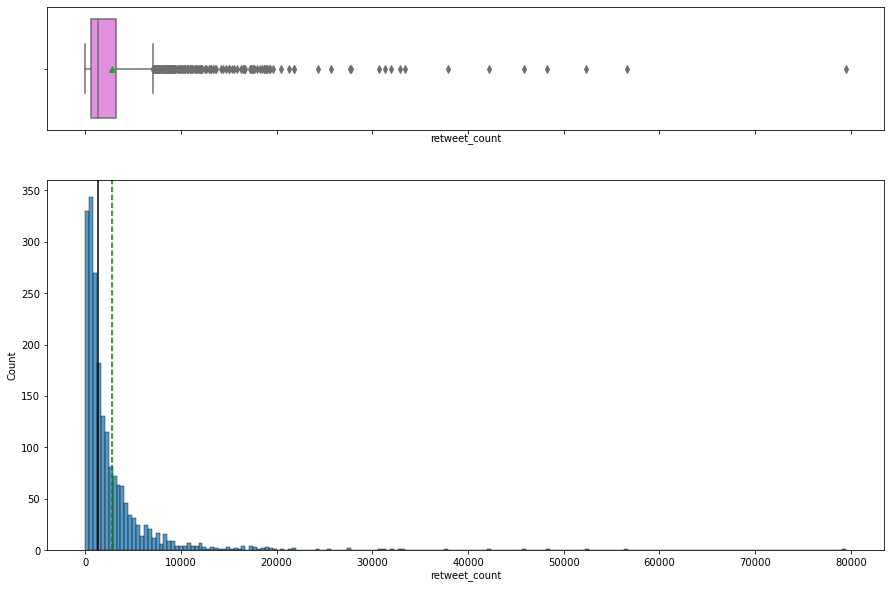

In [103]:
histogram_boxplot(twitter_data, "retweet_count")

#### Insights:

- The retweet count is right skewed which means the average retweet count is more than the median.

- The box plot shows that there is a lot of outliers.

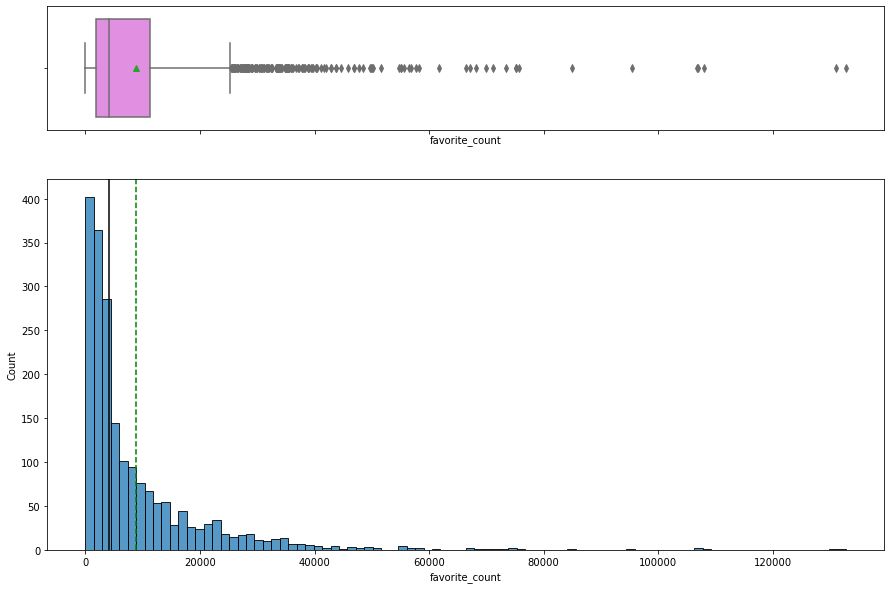

In [104]:
histogram_boxplot(twitter_data, "favorite_count")

#### Insights:

- The favorite count is right skewed which means the average retweet count is more than the median.

- The box plot shows that there is a lot of outliers.

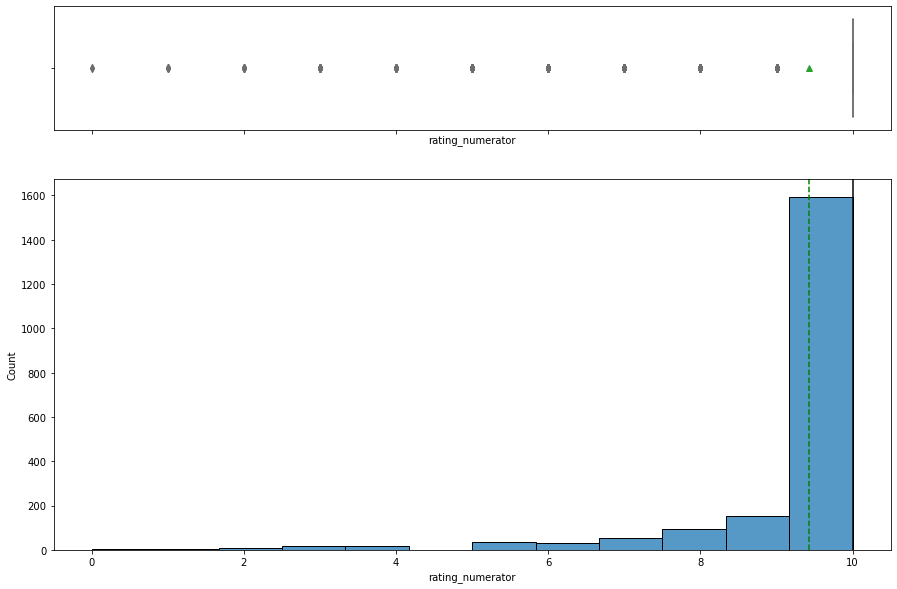

In [105]:
histogram_boxplot(twitter_data, "rating_numerator")

#### Insights

- Most of the ratings are below 10.

In [106]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

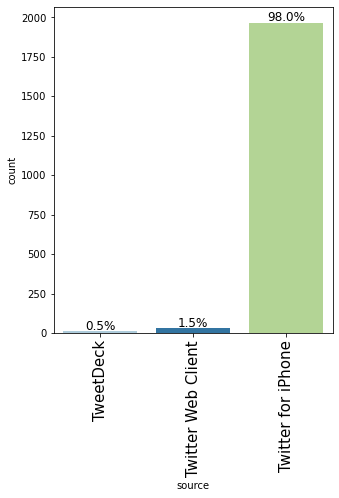

In [107]:
labeled_barplot(twitter_data, "source", perc=True)

#### Insights

- Data extracted are mainly from users that have an iphone followed by the web.

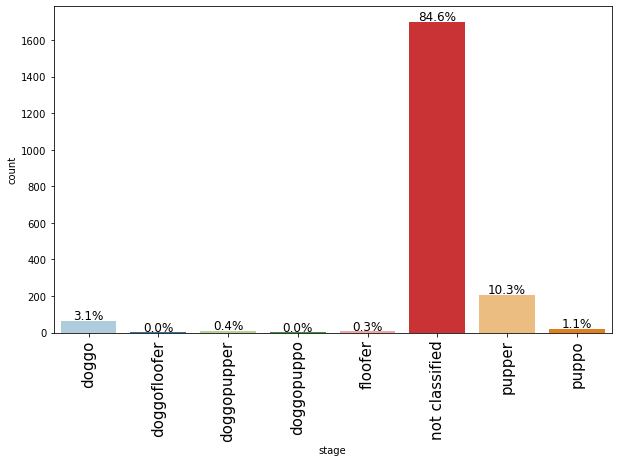

In [108]:
labeled_barplot(twitter_data, "stage", perc=True)

#### Insights

- Most of the data are not classified which signifies missing values followed by pupper.

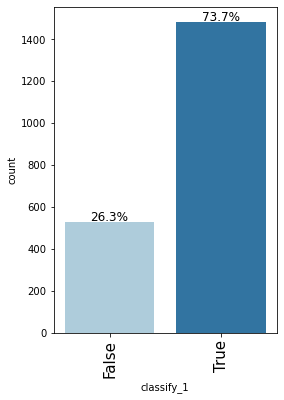

In [109]:
labeled_barplot(twitter_data, "classify_1", perc=True)

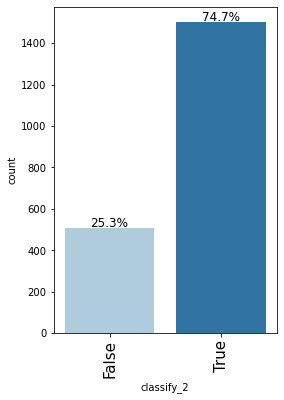

In [110]:
labeled_barplot(twitter_data, "classify_2", perc=True)

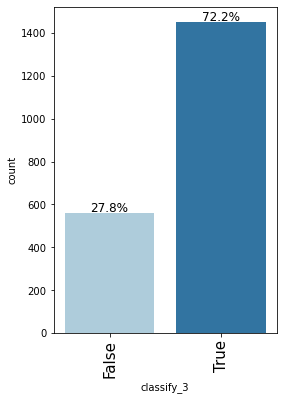

In [111]:
labeled_barplot(twitter_data, "classify_3", perc=True)

#### Insights

- Most of the prediction data are true

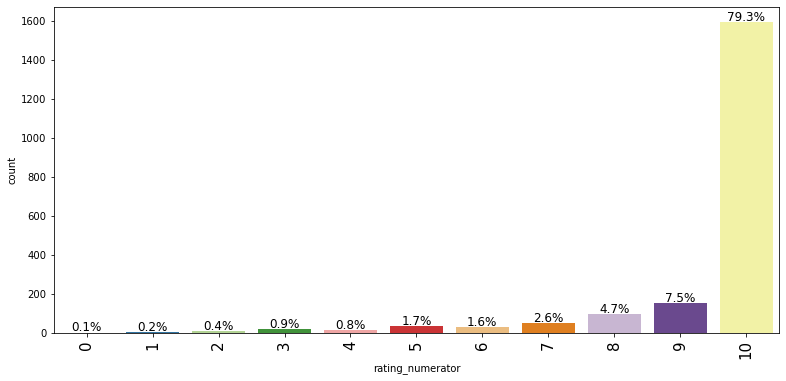

In [112]:
labeled_barplot(twitter_data, "rating_numerator", perc=True)

#### Ratings

- Most ratings are 10.

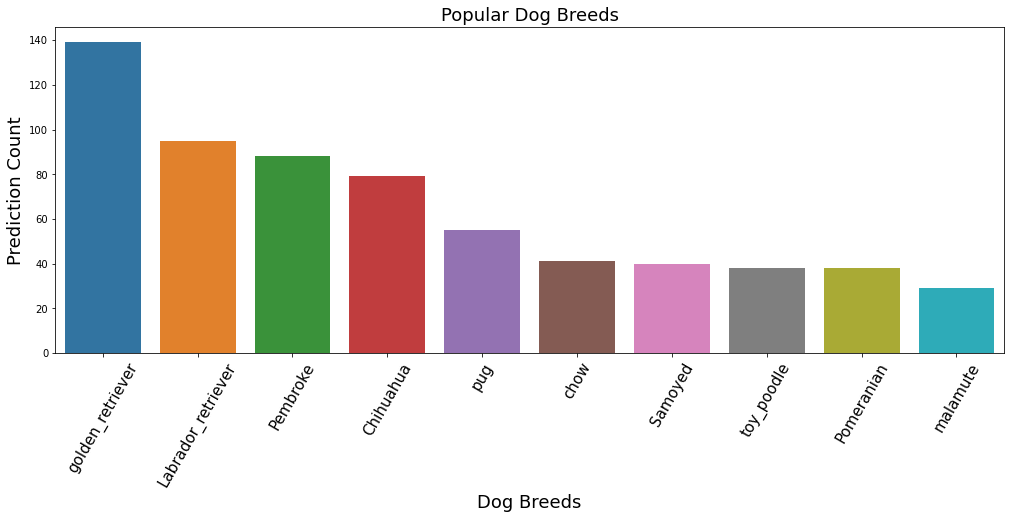

In [113]:
plt.figure(figsize = (17,6))
ax = sns.barplot(x = twitter_data['predict_1'].value_counts()[0:10].index,
            y =twitter_data['predict_1'].value_counts()[0:10],
            data = twitter_data);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 18);
plt.ylabel("Prediction Count",fontsize = 18);
plt.title("Popular Dog Breeds",fontsize = 18);

#### Insights

- The Golden retriever is the most predicted dog breed.

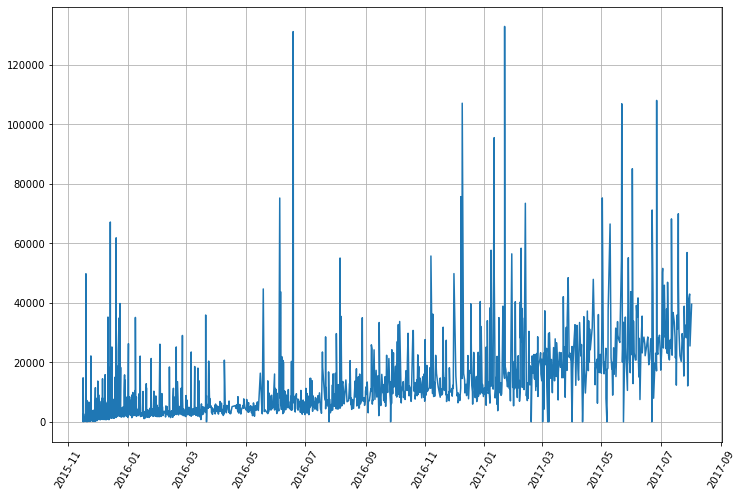

In [114]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
plt.plot(twitter_data.timestamp, twitter_data.favorite_count)
plt.grid()

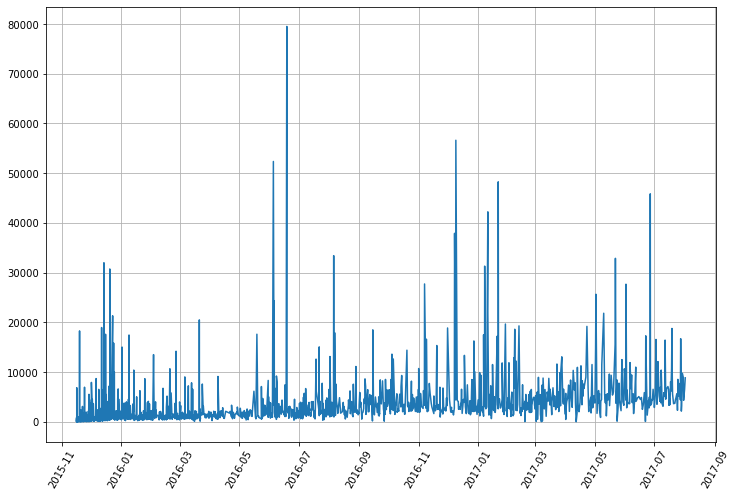

In [115]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=60)
plt.plot(twitter_data.timestamp, twitter_data.retweet_count)
plt.grid()

#### Insights:

- There was more activity between the 5th and 6th month of 2016 based on retweet and favorite counts.